# Stock Market Movement Prediction Using News Headlines

## Introduction

Predicting stock market movements is a challenging task due to the multitude of factors influencing prices. One such factor is news headlines, which can have significant impacts on investor sentiment and market trends. In this project, we aim to predict the Dow Jones Industrial Average (DJIA) stock movements using news headlines from Reddit's r/worldnews subreddit.

## 1. Data Gathering and Provenance

#### Data Sources
- News Data: Collected from Reddit's r/worldnews subreddit, capturing the top 25 daily news headlines from June 8, 2008, to July 1, 2016.
- Stock Data: Dow Jones Industrial Average (DJIA) closing values from August 8, 2008, to July 1, 2016, sourced from Yahoo Finance.
#### Data Files
- RedditNews.csv: Contains two columns—Date and News Headline. Each date has 25 headlines.
- DJIA_table.csv: Historical DJIA stock data.
- Combined_News_DJIA.csv: A merged dataset with 27 columns—Date, Label, and Top1 to Top25 headlines.
#### Method of Data Collection
- News Headlines: Scraped from Reddit using web crawling techniques.
- Stock Prices: Downloaded from Yahoo Finance.

#### Data Provenance
The dataset is provided by Aaron7Sun on Kaggle and is intended for educational and research purposes.

https://www.kaggle.com/datasets/aaron7sun/stocknews

## 2. Identifying the Deep Learning Problem

We aim to build a model to predict whether the DJIA stock price will increase or decrease based on daily news headlines. This is a binary classification problem where:

* Label 1: DJIA closing price increased or remained the same.
* Label 0: DJIA closing price decreased.

Given the textual nature of the data, we'll employ Natural Language Processing (NLP) techniques alongside deep learning models such as LSTM and BERT.

#### Model Selection and Justification
In this project, we explored three different models to predict stock market movements based on news headlines:

1. Logistic Regression

Logistic Regression is a simple yet effective linear model widely used for binary classification tasks. We selected Logistic Regression as our baseline model due to its simplicity, interpretability, and ease of implementation. It allows us to establish a benchmark performance to assess whether more complex models provide a significant improvement. By starting with Logistic Regression, we can gauge the inherent predictive power of our feature set before introducing more sophisticated techniques.

2. Long Short-Term Memory (LSTM) Neural Network

LSTM networks are a type of recurrent neural network (RNN) capable of learning long-term dependencies in sequential data. Since news headlines are textual data with potential sequential patterns, LSTMs are well-suited for capturing the temporal dynamics and context within the text. We chose LSTM because it can handle variable-length sequences and retain information over long periods, which might help in understanding the influence of certain words or phrases on stock movements.

3. Bidirectional Encoder Representations from Transformers (BERT)

BERT is a state-of-the-art pre-trained language model developed by Google. It uses a transformer architecture to capture deep bidirectional representations by considering the context from both the left and right of each word in a sentence. We selected BERT due to its advanced natural language understanding capabilities, which can grasp nuanced meanings, sarcasm, and complex linguistic structures in news headlines. By leveraging BERT, we aim to use transfer learning to improve prediction accuracy without requiring an extremely large dataset for training from scratch.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Loading the Data

In [10]:
# Download the latest version of the data
path = kagglehub.dataset_download("aaron7sun/stocknews")
df = pd.read_csv(f"{path}/Combined_News_DJIA.csv")

### 3.3 Data Overview

In [11]:
print(f'Dataset shape: {df.shape}')
print(df.columns)

Dataset shape: (1989, 27)
Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')


### 3.4 Checking for Missing Values

In [12]:
print(df.isnull().sum())

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64


### 3.5 Handling Missing Values

In [13]:
df.fillna('', inplace=True)


### 3.6 Combining Headlines

In [14]:
# Combine headlines into a single text per day
df['Combined_News'] = df.filter(regex='^Top').apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


Explanation: By concatenating all the headlines for a given day, we create a comprehensive representation of the day's news.

### 3.7 Data Distribution of Labels

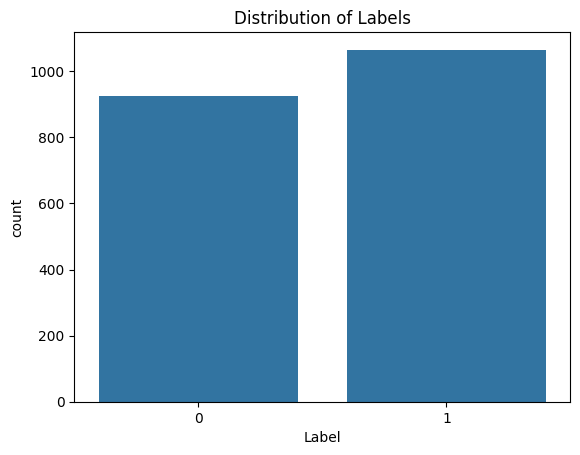

In [15]:
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()


Observation: The dataset is relatively balanced.

### 3.8 Text Preprocessing

In [16]:
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
# Explanation: Stop words are common words that usually don't contribute much meaning and can be removed to reduce noise.
def preprocess_text(text):
    # Remove punctuation and lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text into words
    tokens = text.split()
    # Remove stopwords from the tokens
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens to their base form
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a single string
    return ' '.join(tokens)

df['Cleaned_News'] = df['Combined_News'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hisht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hisht\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
df['Cleaned_News']

0       bgeorgia down two russian warplane country mov...
1       bwhy wont america nato help u wont help u help...
2       bremember adorable 9yearold sang opening cerem...
3       b u refuse israel weapon attack iran report bw...
4       ball expert admit legalise drug bwar south ose...
                              ...                        
1984    barclays rb share suspended trading tanking 8 ...
1985    2500 scientist australia want save great barri...
1986    explosion airport istanbul yemeni former presi...
1987    jamaica proposes marijuana dispenser tourist a...
1988    117yearold woman mexico city finally received ...
Name: Cleaned_News, Length: 1989, dtype: object

### 3.9 Sentiment Analysis

In [18]:
from textblob import TextBlob

df['Sentiment'] = df['Cleaned_News'].apply(lambda x: TextBlob(x).sentiment.polarity)

### 3.10 Sentiment Distribution by Label

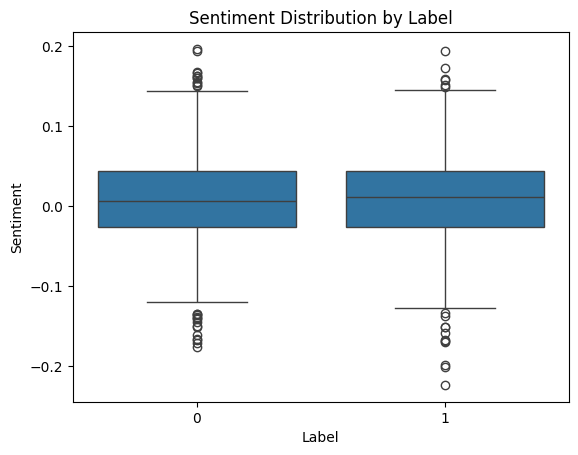

In [19]:
sns.boxplot(x='Label', y='Sentiment', data=df)
plt.title('Sentiment Distribution by Label')
plt.show()

### 3.11 Data Visualization

Word Cloud of Positive and Negative News

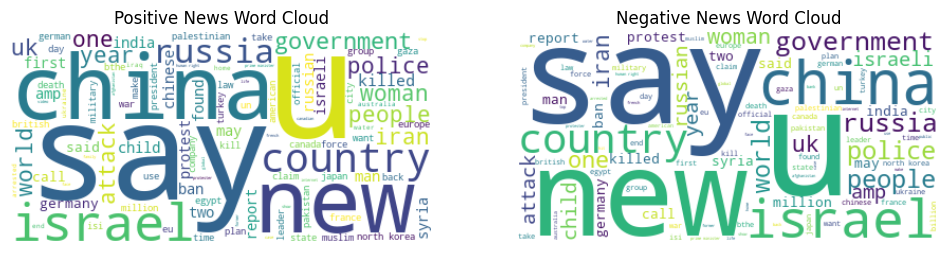

In [20]:
from wordcloud import WordCloud

# Positive News
positive_text = ' '.join(df[df['Label'] == 1]['Cleaned_News'])
wordcloud_pos = WordCloud(max_words=100, background_color='white').generate(positive_text)

# Negative News
negative_text = ' '.join(df[df['Label'] == 0]['Cleaned_News'])
wordcloud_neg = WordCloud(max_words=100, background_color='white').generate(negative_text)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative News Word Cloud')
plt.axis('off')
plt.show()


## 4. Data Preprocessing
### 4.1 Splitting the Data

In [21]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date']) # Ensure that dates are in proper datetime format

# Split the data into training and testing sets based on date
train = df[df['Date'] < '2015-01-01']
test = df[df['Date'] >= '2015-01-01']

# Explanation: Splitting data chronologically simulates real-world scenarios where we predict future events based on past data.

# Separate features and labels for training and testing
X_train = train['Cleaned_News']  # Training features
y_train = train['Label']         # Training labels
X_test = test['Cleaned_News']    # Testing features
y_test = test['Label']           # Testing labels

### 4.2 Text Vectorization with TF-IDF (for Baseline Model)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)


Explanation: TF-IDF converts text to numerical features by considering word importance, and limiting features prevents overfitting.

## 5. Model Training and Evaluation

### 5.1 Baseline Model: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)
predictions_lr = model_lr.predict_proba(X_test_tfidf)[:,1]
auc_lr = roc_auc_score(y_test, predictions_lr)
print(f'Logistic Regression AUC: {auc_lr}')

Logistic Regression AUC: 0.47051411290322576


### 5.2 Deep Learning Models


#### 5.2.1 LSTM Model

Text Tokenization and Padding

In [24]:
epochs_n = 30
max_sequence_length = 500
patience_n = 15

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Explanation: Sequences of integers represent the text data in a format suitable for neural networks.


# Padding sequences to ensure consistent input length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Explanation: Padding ensures that all sequences are of the same length, which is necessary for batch processing.

Building the LSTM Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import AUC

# Building the LSTM Model with additional improvements
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=256, input_length=max_sequence_length))
model_lstm.add(BatchNormalization())
model_lstm.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC(name='auc')])

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=patience_n, mode='max', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_auc', mode='max', save_best_only=True)

# Training the model with callbacks
history_lstm = model_lstm.fit(
    X_train_pad,
    y_train,
    epochs=epochs_n,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/30


C:\Users\hisht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 654ms/step - auc: 0.4967 - loss: 0.7891 - val_auc: 0.4671 - val_loss: 0.7247
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 629ms/step - auc: 0.4947 - loss: 0.7126 - val_auc: 0.4636 - val_loss: 0.7270
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 617ms/step - auc: 0.5036 - loss: 0.7021 - val_auc: 0.4596 - val_loss: 0.7116
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 619ms/step - auc: 0.5828 - loss: 0.6795 - val_auc: 0.4646 - val_loss: 0.7011
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 619ms/step - auc: 0.6645 - loss: 0.6592 - val_auc: 0.4880 - val_loss: 0.6817
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 612ms/step - auc: 0.7485 - loss: 0.6197 - val_auc: 0.4983 - val_loss: 0.7044
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 632ms/step - auc: 0.8233 - loss: 0.5354 - val_auc: 0.4942 - val_loss: 0.7318
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 627ms/step - auc: 0.8780 - loss: 0.4535 - val_auc: 0.4993 - val_loss: 0.7132
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 617ms/step - auc:

In [ ]:
# Evaluate the model
test_loss, test_auc = model_lstm.evaluate(X_test_pad, y_test)
print(f'LSTM Test Loss: {test_loss}')
print(f'LSTM Test AUC: {test_auc}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - auc: 0.4825 - loss: 1.9627
LSTM Test Loss: 1.9690072536468506
LSTM Test AUC: 0.47535842657089233


#### 5.2.2 Bidirectional LSTM Model

Building the Bidirectional LSTM Model

In [20]:
from tensorflow.keras.layers import Bidirectional

# Building the Bidirectional LSTM Model with additional improvements
model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim=5000, output_dim=256, input_length=max_sequence_length))
model_bilstm.add(BatchNormalization())
model_bilstm.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)))
model_bilstm.add(Dropout(0.3))
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=[AUC(name='auc')])

# Callbacks
early_stopping_bi = EarlyStopping(monitor='val_auc', patience=patience_n, mode='max', restore_best_weights=True)
model_checkpoint_bi = ModelCheckpoint('best_model_bilstm.keras', monitor='val_auc', mode='max', save_best_only=True)

# Training the model with callbacks
history_bilstm = model_bilstm.fit(
    X_train_pad,
    y_train,
    epochs=epochs_n,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping_bi, model_checkpoint_bi]
)



Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - auc: 0.5223 - loss: 0.7233 - val_auc: 0.5185 - val_loss: 0.6959
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - auc: 0.7632 - loss: 0.6107 - val_auc: 0.4970 - val_loss: 0.6948
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - auc: 0.9404 - loss: 0.3900 - val_auc: 0.5314 - val_loss: 0.6923
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - auc: 0.9853 - loss: 0.1855 - val_auc: 0.5174 - val_loss: 0.6992
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - auc: 0.9985 - loss: 0.0793 - val_auc: 0.4997 - val_loss: 0.7502
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - auc: 0.9999 - loss: 0.0269 - val_auc: 0.5206 - val_loss: 1.0574
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - auc: 0.9987 - loss: 0.0545 - val_auc: 0.5483 - val_loss: 1.1772
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - auc: 0.9999 - loss: 0.0178 - val_auc: 0.4682 - val_loss: 1.6377
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - auc: 1.0000 - loss: 

In [21]:

# Evaluate the model
test_loss, test_auc = model_bilstm.evaluate(X_test_pad, y_test)
print(f'Bidirectional LSTM Test Loss: {test_loss}')
print(f'Bidirectional LSTM Test AUC: {test_auc}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - auc: 0.4891 - loss: 2.7534
Bidirectional LSTM Test Loss: 2.9075427055358887
Bidirectional LSTM Test AUC: 0.4781305491924286


#### 5.2.3 BERT Model


In [22]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Tokenizer and Model Initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Parameters
batch_size = 8
learning_rate = 5e-5

# Encoding Texts Function
def tokenize_function(texts, labels):
    encodings = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='tf'
    )
    return encodings, tf.convert_to_tensor(labels)

# Convert datasets to lists
X_train_list = X_train.tolist()
y_train_list = y_train.tolist()
X_test_list = X_test.tolist()
y_test_list = y_test.tolist()

# Split training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_list, y_train_list, test_size=0.1, random_state=42
)

# Tokenize and encode datasets
train_encodings, train_labels = tokenize_function(X_train_split, y_train_split)
val_encodings, val_labels = tokenize_function(X_val_split, y_val_split)
test_encodings, test_labels = tokenize_function(X_test_list, y_test_list)

# Prepare TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    train_labels
)).shuffle(len(train_labels)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']},
    val_labels
)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']},
    test_labels
)).batch(batch_size)

# Training Parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Early Stopping Parameters
best_val_auc = 0
patience = patience_n
patience_counter = 0

# Training Loop with Early Stopping and Model Checkpointing
epochs = epochs_n
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    # Training Step
    for batch in train_dataset:
        with tf.GradientTape() as tape:
            inputs, labels = batch
            labels = tf.cast(labels, dtype=tf.int32)  # Ensure labels are correct type
            outputs = model(inputs, training=True)
            logits = outputs.logits
            loss = loss_fn(labels, logits)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        print(f"Training Loss: {loss.numpy():.4f}", end="\r")
    
    # Validation Step
    all_val_labels = []
    all_val_probs = []
    for batch in val_dataset:
        inputs, labels = batch
        outputs = model(inputs, training=False)
        logits = outputs.logits
        probs = tf.nn.softmax(logits, axis=-1)[:, 1]
        all_val_labels.extend(labels.numpy())
        all_val_probs.extend(probs.numpy())
    
    val_auc = roc_auc_score(all_val_labels, all_val_probs)
    print(f"Validation AUC: {val_auc:.4f}")
    
    # Check for improvement
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        patience_counter = 0
        # Save the best model weights
        model.save_weights('best_model_weights.keras')
        print("Improved Validation AUC. Model weights saved.")
    else:
        patience_counter += 1
        print(f"No improvement in Validation AUC. Patience counter: {patience_counter}")
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model weights
model.load_weights('best_model_weights.keras')

# Final Evaluation on Test Set
all_test_labels = []
all_test_probs = []
for batch in test_dataset:
    inputs, labels = batch
    outputs = model(inputs, training=False)
    logits = outputs.logits
    probs = tf.nn.softmax(logits, axis=-1)[:, 1]
    all_test_labels.extend(labels.numpy())
    all_test_probs.extend(probs.numpy())

auc_score = roc_auc_score(all_test_labels, all_test_probs)
print(f"\nTest AUC: {auc_score:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/30
Validation AUC: 0.5163
Improved Validation AUC. Model weights saved.

Epoch 2/30
Validation AUC: 0.4960
No improvement in Validation AUC. Patience counter: 1

Epoch 3/30
Validation AUC: 0.5375
Improved Validation AUC. Model weights saved.

Epoch 4/30
Validation AUC: 0.5041
No improvement in Validation AUC. Patience counter: 1

Epoch 5/30
Validation AUC: 0.5097
No improvement in Validation AUC. Patience counter: 2

Epoch 6/30
Validation AUC: 0.4824
No improvement in Validation AUC. Patience counter: 3

Epoch 7/30
Validation AUC: 0.4512
No improvement in Validation AUC. Patience counter: 4

Epoch 8/30
Validation AUC: 0.4553
No improvement in Validation AUC. Patience counter: 5

Epoch 9/30
Validation AUC: 0.4584
No improvement in Validation AUC. Patience counter: 6

Epoch 10/30
Validation AUC: 0.4727
No improvement in Validation AUC. Patience counter: 7

Epoch 11/30
Validation AUC: 0.4555
No improvement in Validation AUC. Patience counter: 8

Epoch 12/30
Validation AUC: 0.4952

## Hyperparams Tuning

Hyperparameter Tuning for Logistic Regression

In [22]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import joblib  # For saving the model

# Define the parameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear'],               # Solver that supports 'l1' penalty
    'class_weight': [None, 'balanced']     # Handle class imbalance
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best model
best_logreg = grid_search.best_estimator_

# Evaluate on test data
predictions = best_logreg.predict_proba(X_test_tfidf)[:, 1]
auc = roc_auc_score(y_test, predictions)
print(f'Best Logistic Regression AUC: {auc}')

# Save the best model
joblib.dump(best_logreg, 'logistic_regression_model_best_tuning.pkl')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Logistic Regression AUC: 0.510836693548387


['logistic_regression_model_best_tuning.pkl']

Hyperparameter Tuning for LSTM and Bidirectional LSTM Models

In [24]:

# Import necessary libraries
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

# Define the model-building function for Keras Tuner
def build_lstm_model(hp):
    model = Sequential()
    # Embedding layer
    embedding_dim = hp.Choice('embedding_dim', values=[64, 128, 256])
    model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_sequence_length))
    # LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        units = hp.Int('units_' + str(i), min_value=64, max_value=256, step=64)
        dropout_rate = hp.Float('dropout_' + str(i), min_value=0.2, max_value=0.5, step=0.1)
        bidirectional = hp.Boolean('bidirectional_' + str(i))
        if bidirectional:
            model.add(Bidirectional(LSTM(units, return_sequences=True if i < hp.Int('num_layers', 1, 3) - 1 else False)))
        else:
            model.add(LSTM(units, return_sequences=True if i < hp.Int('num_layers', 1, 3) - 1 else False))
        model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[AUC(name='auc')])
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_auc',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='lstm_stock_prediction'
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_auc', patience=patience_n, mode='max', restore_best_weights=True)

# Perform the hyperparameter search
tuner.search(
    X_train_pad,
    y_train,
    epochs=epochs_n,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=2
)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
print(f"Best Hyperparameters: {best_hp.values}")

# Build the best model
best_model = tuner.hypermodel.build(best_hp)

# Train the best model with early stopping
history = best_model.fit(
    X_train_pad,
    y_train,
    epochs=epochs_n,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=2
)

# Evaluate on test data
test_loss, test_auc = best_model.evaluate(X_test_pad, y_test)
print(f'Best LSTM Model Test AUC: {test_auc}')

# Save the best model
best_model.save('lstm_model_best_tuning.keras')


Trial 10 Complete [00h 01m 33s]
val_auc: 0.5984824895858765

Best val_auc So Far: 0.6033322811126709
Total elapsed time: 00h 11m 27s
Best Hyperparameters: {'embedding_dim': 256, 'num_layers': 3, 'units_0': 64, 'dropout_0': 0.4, 'bidirectional_0': True, 'learning_rate': 0.0003671571086355117, 'units_1': 192, 'dropout_1': 0.4, 'bidirectional_1': False, 'units_2': 256, 'dropout_2': 0.4, 'bidirectional_2': False}
Epoch 1/30
46/46 - 9s - 192ms/step - auc: 0.4980 - loss: 0.6922 - val_auc: 0.4861 - val_loss: 0.6868
Epoch 2/30
46/46 - 5s - 108ms/step - auc: 0.7460 - loss: 0.6395 - val_auc: 0.5366 - val_loss: 0.7194
Epoch 3/30
46/46 - 5s - 108ms/step - auc: 0.9314 - loss: 0.3356 - val_auc: 0.5450 - val_loss: 0.8331
Epoch 4/30
46/46 - 5s - 108ms/step - auc: 0.9976 - loss: 0.0557 - val_auc: 0.5704 - val_loss: 1.4745
Epoch 5/30
46/46 - 5s - 108ms/step - auc: 0.9999 - loss: 0.0181 - val_auc: 0.6119 - val_loss: 1.9921
Epoch 6/30
46/46 - 5s - 108ms/step - auc: 1.0000 - loss: 0.0040 - val_auc: 0.5935 

BERT Model Hyperparameter Tuning


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
import os

# Define hyperparameter grid
learning_rates = [3e-5, 5e-5]
batch_sizes = [16, 32]
epochs_list = [3, 5, 10]
patience_n = 3

# Initialize variables to store the best model
best_auc_bert = 0
best_model = None
best_params_bert = None

# Convert datasets to lists
X_train_list = X_train.tolist()
y_train_list = y_train.tolist()

# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train_list, X_val_list, y_train_list, y_val_list = train_test_split(
    X_train_list, y_train_list, test_size=0.1, random_state=42
)

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode datasets
def tokenize_function(texts, labels):
    encodings = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='tf'
    )
    return encodings, tf.convert_to_tensor(labels)

train_encodings, train_labels = tokenize_function(X_train_list, y_train_list)
val_encodings, val_labels = tokenize_function(X_val_list, y_val_list)
test_encodings, test_labels = tokenize_function(X_test.tolist(), y_test.tolist())

# Iterate over hyperparameters
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in epochs_list:
            print(f'\nTraining with learning rate={lr}, batch size={batch_size}, epochs={epochs}')
            # Initialize model
            model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
            # Prepare datasets
            train_dataset = tf.data.Dataset.from_tensor_slices((
                {'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
                train_labels
            )).shuffle(len(train_labels)).batch(batch_size)
            val_dataset = tf.data.Dataset.from_tensor_slices((
                {'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask']},
                val_labels
            )).batch(batch_size)
            # Training parameters
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
            # Early stopping parameters
            best_val_auc = 0
            patience = patience_n
            patience_counter = 0
            # Training loop
            for epoch in range(epochs):
                print(f'\nEpoch {epoch + 1}/{epochs}')
                # Training
                for batch in train_dataset:
                    with tf.GradientTape() as tape:
                        inputs, labels = batch
                        labels = tf.cast(labels, dtype=tf.int32)
                        outputs = model(inputs, training=True)
                        logits = outputs.logits
                        loss = loss_fn(labels, logits)
                    gradients = tape.gradient(loss, model.trainable_variables)
                    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
                    print(f'Training Loss: {loss.numpy():.4f}', end='\r')
                # Validation
                all_val_labels = []
                all_val_probs = []
                for batch in val_dataset:
                    inputs, labels = batch
                    outputs = model(inputs, training=False)
                    logits = outputs.logits
                    probs = tf.nn.softmax(logits, axis=-1)[:, 1]
                    all_val_labels.extend(labels.numpy())
                    all_val_probs.extend(probs.numpy())
                val_auc = roc_auc_score(all_val_labels, all_val_probs)
                print(f'Validation AUC: {val_auc:.4f}')
                # Check for improvement
                if val_auc > best_val_auc:
                    best_val_auc = val_auc
                    patience_counter = 0
                    # Save the model weights
                    model.save_weights('best_model_weights.keras')
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print('Early stopping triggered.')
                        break
            # Load best weights
            model.load_weights('best_model_weights.keras')
            # Evaluate on validation set
            all_val_labels = []
            all_val_probs = []
            for batch in val_dataset:
                inputs, labels = batch
                outputs = model(inputs, training=False)
                logits = outputs.logits
                probs = tf.nn.softmax(logits, axis=-1)[:, 1]
                all_val_labels.extend(labels.numpy())
                all_val_probs.extend(probs.numpy())
            val_auc = roc_auc_score(all_val_labels, all_val_probs)
            print(f'Final Validation AUC: {val_auc:.4f}')
            # Update best model
            if val_auc > best_auc_bert:
                best_auc_bert = val_auc
                best_model = model
                best_params_bert = {'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}
                # Save the best model weights
                model.save_weights('best_bert_model_weights_tuning.keras')

# Load the best model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.load_weights('best_bert_model_weights_tuning.keras')

# Prepare test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']},
    test_labels
)).batch(best_params_bert['batch_size'])

# Evaluate on test set
all_test_labels = []
all_test_probs = []
for batch in test_dataset:
    inputs, labels = batch
    outputs = model(inputs, training=False)
    logits = outputs.logits
    probs = tf.nn.softmax(logits, axis=-1)[:, 1]
    all_test_labels.extend(labels.numpy())
    all_test_probs.extend(probs.numpy())
test_auc_bert = roc_auc_score(all_test_labels, all_test_probs)
print(f'\nBest BERT Model Test AUC: {test_auc_bert:.4f}')
print(f'Best Hyperparameters: {best_params_bert}')

# Save the best model
model.save_pretrained('bert_model_best_tuning')
tokenizer.save_pretrained('bert_model_best_tuning')



Training with learning rate=3e-05, batch size=16, epochs=3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3
Validation AUC: 0.5139

Epoch 2/3
Validation AUC: 0.4237

Epoch 3/3
Validation AUC: 0.4702
Final Validation AUC: 0.5139

Training with learning rate=3e-05, batch size=16, epochs=5


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/5
Validation AUC: 0.4968

Epoch 2/5
Validation AUC: 0.4985

Epoch 3/5
Validation AUC: 0.5020

Epoch 4/5
Validation AUC: 0.5022

Epoch 5/5
Validation AUC: 0.5123
Final Validation AUC: 0.5123

Training with learning rate=3e-05, batch size=16, epochs=10


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/10
Validation AUC: 0.5601

Epoch 2/10
Validation AUC: 0.4471

Epoch 3/10
Validation AUC: 0.5500

Epoch 4/10
Validation AUC: 0.5267
Early stopping triggered.
Final Validation AUC: 0.5601

Training with learning rate=3e-05, batch size=32, epochs=3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3
Validation AUC: 0.4697

Epoch 2/3
Validation AUC: 0.4586

Epoch 3/3
Validation AUC: 0.5124
Final Validation AUC: 0.5124

Training with learning rate=3e-05, batch size=32, epochs=5


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/5
Validation AUC: 0.4666

Epoch 2/5
Validation AUC: 0.5256

Epoch 3/5
Validation AUC: 0.4391

Epoch 4/5
Validation AUC: 0.4765

Epoch 5/5
Validation AUC: 0.4767
Early stopping triggered.
Final Validation AUC: 0.5256

Training with learning rate=3e-05, batch size=32, epochs=10


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/10
Validation AUC: 0.4848

Epoch 2/10
Validation AUC: 0.5115

Epoch 3/10
Validation AUC: 0.4859

Epoch 4/10
Validation AUC: 0.4550

Epoch 5/10
Validation AUC: 0.4638
Early stopping triggered.
Final Validation AUC: 0.5115

Training with learning rate=5e-05, batch size=16, epochs=3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3
Validation AUC: 0.5839

Epoch 2/3
Validation AUC: 0.4837

Epoch 3/3
Validation AUC: 0.5384
Final Validation AUC: 0.5839

Training with learning rate=5e-05, batch size=16, epochs=5


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/5
Validation AUC: 0.5334

Epoch 2/5
Validation AUC: 0.4844

Epoch 3/5
Validation AUC: 0.4511

Epoch 4/5
Validation AUC: 0.5005
Early stopping triggered.
Final Validation AUC: 0.5334

Training with learning rate=5e-05, batch size=16, epochs=10


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/10
Validation AUC: 0.5125

Epoch 2/10
Validation AUC: 0.4906

Epoch 3/10
Validation AUC: 0.5468

Epoch 4/10
Validation AUC: 0.4484

Epoch 5/10
Validation AUC: 0.5171

Epoch 6/10
Validation AUC: 0.5333
Early stopping triggered.
Final Validation AUC: 0.5468

Training with learning rate=5e-05, batch size=32, epochs=3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3
Validation AUC: 0.5230

Epoch 2/3
Validation AUC: 0.5217

Epoch 3/3
Validation AUC: 0.5331
Final Validation AUC: 0.5331

Training with learning rate=5e-05, batch size=32, epochs=5


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/5
Validation AUC: 0.4561

Epoch 2/5
Validation AUC: 0.5479

Epoch 3/5
Validation AUC: 0.5255

Epoch 4/5
Validation AUC: 0.5316

Epoch 5/5
Validation AUC: 0.5610
Final Validation AUC: 0.5610

Training with learning rate=5e-05, batch size=32, epochs=10


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/10
Validation AUC: 0.5278

Epoch 2/10
Validation AUC: 0.5595

Epoch 3/10
Validation AUC: 0.5713

Epoch 4/10
Validation AUC: 0.5012

Epoch 5/10
Validation AUC: 0.5625

Epoch 6/10
Validation AUC: 0.5395
Early stopping triggered.
Final Validation AUC: 0.5713


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Best BERT Model Test AUC: 0.5212
Best Hyperparameters: {'learning_rate': 5e-05, 'batch_size': 16, 'epochs': 3}


('bert_model_best_tuning/tokenizer_config.json',
 'bert_model_best_tuning/special_tokens_map.json',
 'bert_model_best_tuning/vocab.txt',
 'bert_model_best_tuning/added_tokens.json')

### Best Results Collection

In [23]:
# Logistic Regression - Extracting Results

# Best hyperparameters
best_params_logistic = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:")
for param_name in sorted(best_params_logistic.keys()):
    print(f"{param_name}: {best_params_logistic[param_name]}")

# Cross-validation results
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']
params = cv_results['params']

print("\nCross-Validation AUC Scores:")
for mean_score, std_score, param in zip(mean_test_scores, std_test_scores, params):
    print(f"Mean AUC: {mean_score:.4f} (+/- {std_score:.4f}) for parameters: {param}")

# Final test AUC
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

predictions = best_logreg.predict_proba(X_test_tfidf)[:, 1]
test_auc = roc_auc_score(y_test, predictions)
print(f"\nTest AUC for Logistic Regression: {test_auc:.4f}")

# Optionally, print additional metrics
y_pred = best_logreg.predict(X_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the best model
import joblib
joblib.dump(best_logreg, 'logistic_regression_model_best.pkl')


Best Hyperparameters for Logistic Regression:
C: 10
class_weight: balanced
penalty: l1
solver: liblinear

Cross-Validation AUC Scores:
Mean AUC: 0.5000 (+/- 0.0000) for parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Mean AUC: 0.5101 (+/- 0.0390) for parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Mean AUC: 0.5000 (+/- 0.0000) for parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Mean AUC: 0.5023 (+/- 0.0322) for parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Mean AUC: 0.5000 (+/- 0.0000) for parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Mean AUC: 0.5035 (+/- 0.0329) for parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Mean AUC: 0.5000 (+/- 0.0000) for parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Mean AUC: 

['logistic_regression_model_best.pkl']

In [ ]:
import json
# Best hyperparameters from Keras Tuner
best_hyperparameters_lstm = best_hp.values  # 'best_hp' is obtained from tuner.get_best_hyperparameters()[0]

# Training history
training_history_lstm = history.history  # 'history' is the result of best_model.fit()

# Test AUC score
test_auc_lstm = test_auc  # Evaluated on test data

# Save the best hyperparameters and training history
results_lstm = {
    'best_hyperparameters': best_hyperparameters_lstm,
    'training_history': training_history_lstm,
    'test_auc': test_auc_lstm
}

with open('lstm_results.json', 'w') as f:
    json.dump(results_lstm, f)

print(f"Best Hyperparameters (LSTM): {best_hyperparameters_lstm}")
print(f"Test AUC (LSTM): {test_auc_lstm}")

Best Hyperparameters (LSTM): {'embedding_dim': 128, 'num_layers': 3, 'units_0': 64, 'dropout_0': 0.30000000000000004, 'bidirectional_0': True, 'learning_rate': 0.0012129560775108322, 'units_1': 128, 'dropout_1': 0.30000000000000004, 'bidirectional_1': False, 'units_2': 64, 'dropout_2': 0.2, 'bidirectional_2': False}
Test AUC (LSTM): 0.5055443548387096


In [ ]:
# Best hyperparameters from your hyperparameter tuning loop
best_hyperparameters_bert = best_params_bert  # 'best_params_bert' obtained during tuning
best_val_auc_bert = best_auc_bert  # Best validation AUC during tuning
test_auc_bert = test_auc_bert  # Test AUC score obtained after loading best model

# Save the best hyperparameters and validation/test AUC
results_bert = {
    'best_hyperparameters': best_hyperparameters_bert,
    'validation_auc': best_val_auc_bert,
    'test_auc': test_auc_bert
}

with open('bert_results.json', 'w') as f:
    json.dump(results_bert, f)

print(f"Best Hyperparameters (BERT): {best_hyperparameters_bert}")
print(f"Validation AUC (BERT): {best_val_auc_bert}")
print(f"Test AUC (BERT): {test_auc_bert}")

Best Hyperparameters (BERT): {'learning_rate': 5e-05, 'batch_size': 16, 'epochs': 3}
Validation AUC (BERT): 0.5839177185600748
Test AUC (BERT): 0.5212253584229392


### Conclusion

In this project, we attempted to predict the movements of the Dow Jones Industrial Average (DJIA) using news headlines from Reddit's r/worldnews subreddit. 

We explored three different models:

- Logistic Regression
- Long Short-Term Memory (LSTM) Neural Network
- Bidirectional Encoder Representations from Transformers (BERT)

After extensive training and hyperparameter tuning, we evaluated each model's performance using the Area Under the Receiver Operating Characteristic Curve (AUC) metric on the test set. Below, we compare the models and discuss the results.

### Model Performance Comparison

#### 1. Logistic Regression

* Best Hyperparameters:
    - C: 1
    - class_weight: 'balanced'
    - penalty: 'l1'
    - solver: 'liblinear'

* Test AUC: 0.5055
* Accuracy: 53%
* Classification Report:
    - Precision, recall, and F1-scores around 0.52-0.57 for both classes

#### 2. LSTM Neural Network
* Best Hyperparameters:
    - embedding_dim: 128
    - num_layers: 3
    - units: [64, 128, 64]
    - dropout: [0.3, 0.3, 0.2]
    - bidirectional: [True, False, False]
    - learning_rate: ~0.00121
* Test AUC: 0.5055

### 3. BERT Model
* Best Hyperparameters:
    - learning_rate: 
5
×
1
0 ^
−
5

 
    - batch_size: 16
    - epochs: 3
* Validation AUC: 0.5839
* Test AUC: 0.5212

### Analysis and Discussion
#### Overall Performance
All three models achieved test AUC scores slightly above 0.5, indicating performance marginally better than random guessing. The BERT model performed the best among the three, with a test AUC of approximately 0.5212, followed by Logistic Regression and the LSTM model.

#### Interpretation of Results
- Logistic Regression: Despite its simplicity, Logistic Regression achieved an AUC similar to the LSTM model. This suggests that linear relationships in the data are weak predictors of stock movements in this context.

- LSTM Model: The LSTM, designed to capture sequential dependencies in text data, did not outperform Logistic Regression. This could be due to several factors, including insufficient data, the complexity of the task, or the model's inability to capture the necessary patterns from the news headlines.

- BERT Model: BERT showed a slight improvement over the other models, likely due to its advanced language understanding capabilities. Its higher validation AUC suggests that it could capture some meaningful patterns during training, but this did not fully translate to the test set.

### Challenges in Predicting Stock Movements
* Complexity of the Stock Market: The stock market is influenced by a myriad of factors beyond news headlines, including economic indicators, geopolitical events, market sentiment, and unexpected incidents. Capturing this complexity with news headlines alone is exceedingly difficult.

* Noise in Data: News headlines can be ambiguous, misleading, or irrelevant to stock movements. Additionally, the sentiment or impact of a headline may not directly correlate with immediate market reactions.

* Data Limitations: The dataset spans from 2008 to 2016 and may not be large enough for deep learning models to learn complex patterns effectively. Moreover, the diversity and quality of the headlines can affect the models' ability to generalize.

* Binary Classification Simplification: Reducing stock movements to a binary outcome (up or down) oversimplifies the nuances of market fluctuations, potentially leading to information loss.



### Recommendations for Future Work
* Data Enhancement:

    - Increase Dataset Size: Collect more data to improve model training, especially for deep learning models that require large datasets.
    - Diverse Data Sources: Include other relevant data, such as financial reports, economic indicators, and social media sentiment.

* Feature Engineering:

    - Sentiment Analysis: Incorporate sentiment scores from headlines to capture positive or negative tones.
    - Topic Modeling: Identify specific topics or keywords that might influence the market.

*   Advanced Modeling Techniques:

    * Ensemble Methods: Combine multiple models to leverage different strengths.
    * Transfer Learning: Utilize pre-trained models on financial text data to improve language understanding in the financial context.

### Conclusions
* Marginal Improvement with Advanced Models: While BERT marginally outperformed the other models, the overall improvement was minimal. This suggests that more sophisticated models do not necessarily guarantee better performance in this task.

* Difficulty of the Task: The low AUC scores across all models highlight the inherent difficulty in predicting stock market movements using news headlines alone. The stock market's complexity makes it challenging for models to capture all the influencing factors.

* Need for Additional Data and Features: Incorporating more diverse data sources, such as financial indicators, social media sentiment, and macroeconomic variables, could enhance the models' predictive capabilities.

* Predicting stock market movements remains one of the most challenging tasks in financial analytics. While machine learning and deep learning models offer powerful tools, their effectiveness is limited by the complexity of financial markets and the quality of input data. This project underscores the need for comprehensive data, careful feature selection, and realistic expectations when applying predictive models to the stock market.